In [3]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset = r'D:\Food_count'

In [5]:
import pathlib
data_dir = pathlib.Path(dataset)
data_dir

WindowsPath('D:/Food_count')

In [6]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('D:/Food_count/chicken_curry/download (1).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/download (2).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/download (3).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/download (4).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/download.jpg'),
 WindowsPath('D:/Food_count/chicken_curry/images (1).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/images (2).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/images (3).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/images (4).jpg'),
 WindowsPath('D:/Food_count/chicken_curry/images.jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (1).jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (2).jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (3).jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (4).jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (5).jpg'),
 WindowsPath('D:/Food_count/fish and chips/download (6).jpg'),
 WindowsPath('D:/Foo

In [7]:
len(list(data_dir.glob('*/*.jpg')))

59

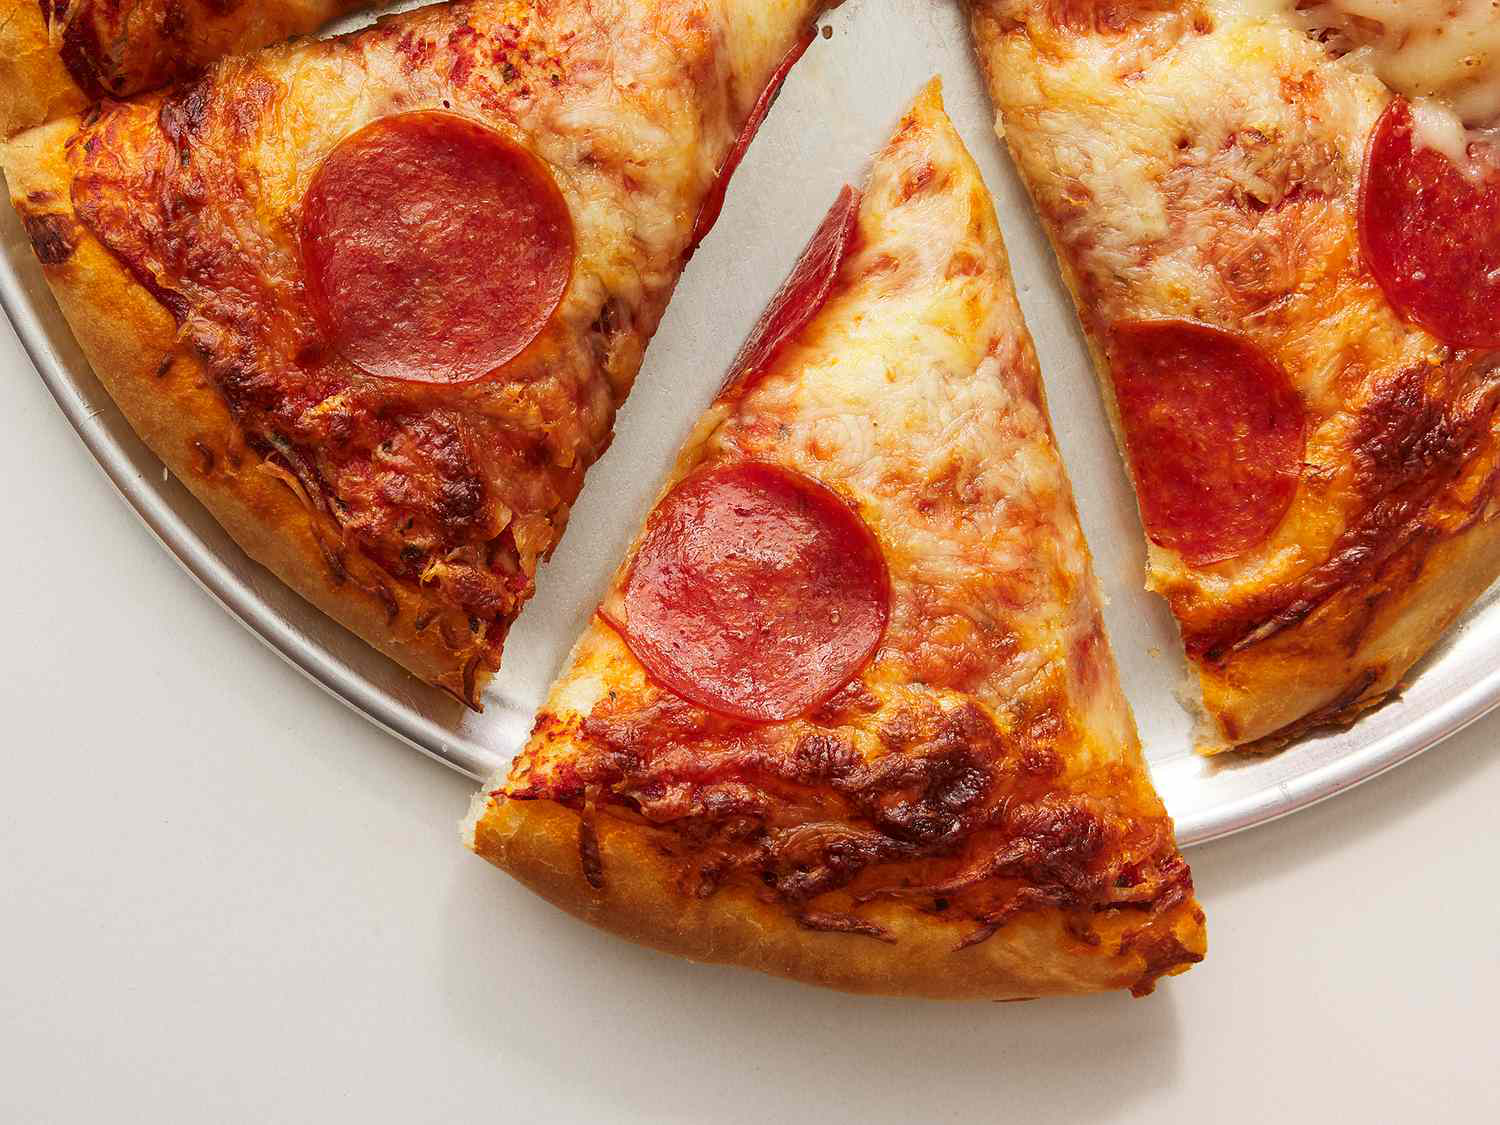

In [8]:
pizza = list(data_dir.glob('pizza/*.jpg'))
PIL.Image.open(str(pizza[0]))

In [9]:
img = cv2.imread(str(pizza[0]))
img.shape

(1125, 1500, 3)

In [10]:
food_images = {
    'chicken_curry' : list(data_dir.glob('chicken_curry/*.jpg')),
    'fish and chips' : list(data_dir.glob('fish and chips/*.jpg')),
    'frozen_yogurt' : list(data_dir.glob('frozen_yogurt/*.jpg')),
    'pizza' : list(data_dir.glob('pizza/*.jpg')),
    'pork_chop' : list(data_dir.glob('pork_chop/*.jpg')),
    'waffles' : list(data_dir.glob('waffles/*.jpg'))
}

In [11]:
food_labels = {
    'chicken_curry' : 320,
    'fish and chips' : 900,
    'frozen_yogurt' : 120,
    'pizza' : 1500,
    'pork_chop' : 180,
    'waffles' : 230
}

In [12]:
x,y = [],[]

for names, images in food_images.items():
    for image in images:
        img = cv2.imread(str(image))
        image_resize = cv2.resize(img,(180,180))
        x.append(image_resize)
        y.append(food_labels[names])

In [13]:
x= np.array(x)
y= np.array(y)

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='linear')
])

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [18]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30


2/2 [==============================] - 3s 142ms/step - loss: 486059.6562 - mae: 508.3141
Epoch 2/30
2/2 [==============================] - 0s 142ms/step - loss: 351468.7812 - mae: 383.9498
Epoch 3/30
2/2 [==============================] - 0s 135ms/step - loss: 228060.3594 - mae: 408.3781
Epoch 4/30
2/2 [==============================] - 0s 158ms/step - loss: 294196.5938 - mae: 483.1725
Epoch 5/30
2/2 [==============================] - 0s 118ms/step - loss: 211574.7188 - mae: 390.4445
Epoch 6/30
2/2 [==============================] - 0s 147ms/step - loss: 246643.3594 - mae: 357.0954
Epoch 7/30
2/2 [==============================] - 0s 134ms/step - loss: 267287.6250 - mae: 347.9456
Epoch 8/30
2/2 [==============================] - 0s 141ms/step - loss: 247597.4844 - mae: 348.5499
Epoch 9/30
2/2 [==============================] - 0s 116ms/step - loss: 211852.6406 - mae: 367.1060
Epoch 10/30
2/2 [==============================] - 0s 129ms/step - loss: 214768.8125 - mae: 414.05

In [19]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 142ms/step - loss: 167362.5938 - mae: 340.3764


[167362.59375, 340.3764343261719]